Imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

Loading Data

In [2]:
# Creating dataframe to store the data
df=pd.read_csv(r'archive\train.csv')
df.head()

C:\Users\harsh\AppData\Local\Temp\ipykernel_19680\1459139933.py:2: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv(r'archive\train.csv')


,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [3]:
len(df)

100000

Data Preprocessing

In [4]:
df.isna().sum()

ID                              0
Customer_ID                     0
Month                           0
Name                         9985
Age                             0
SSN                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit            0
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              1200
Credit_Score                    0
dtype: int64

In [5]:
df.select_dtypes('O').info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 20 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   ID                       100000 non-null  object
 1   Customer_ID              100000 non-null  object
 2   Month                    100000 non-null  object
 3   Name                     90015 non-null   object
 4   Age                      100000 non-null  object
 5   SSN                      100000 non-null  object
 6   Occupation               100000 non-null  object
 7   Annual_Income            100000 non-null  object
 8   Num_of_Loan              100000 non-null  object
 9   Type_of_Loan             88592 non-null   object
 10  Num_of_Delayed_Payment   92998 non-null   object
 11  Changed_Credit_Limit     100000 non-null  object
 12  Credit_Mix               100000 non-null  object
 13  Outstanding_Debt         100000 non-null  object
 14  Credit_History_Age   

In [6]:
def text_cleaning(data):
    if data is np.NaN or not isinstance(data, str):
        return data
    else:
        return str(data).strip('_ ,"')

In [7]:
df = df.applymap(text_cleaning).replace(['', 'nan', '!@9#%8', '#F%$D@*&8'], np.NaN)
df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,NaN,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [8]:
df.isna().sum()

ID                              0
Customer_ID                     0
Month                           0
Name                         9985
Age                             0
SSN                          5572
Occupation                   7062
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit         2091
Num_Credit_Inquiries         1965
Credit_Mix                  20195
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour            7600
Monthly_Balance              1200
Credit_Score                    0
dtype: int64

In [9]:
df.select_dtypes('O').info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 20 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   ID                       100000 non-null  object
 1   Customer_ID              100000 non-null  object
 2   Month                    100000 non-null  object
 3   Name                     90015 non-null   object
 4   Age                      100000 non-null  object
 5   SSN                      94428 non-null   object
 6   Occupation               92938 non-null   object
 7   Annual_Income            100000 non-null  object
 8   Num_of_Loan              100000 non-null  object
 9   Type_of_Loan             88592 non-null   object
 10  Num_of_Delayed_Payment   92998 non-null   object
 11  Changed_Credit_Limit     97909 non-null   object
 12  Credit_Mix               79805 non-null   object
 13  Outstanding_Debt         100000 non-null  object
 14  Credit_History_Age   

In [10]:
df['ID']                      = df.ID.apply(lambda x: int(x, 16))
df['Customer_ID']             = df.Customer_ID.apply(lambda x: int(x[4:], 16))
df['Month']                   = pd.to_datetime(df.Month, format='%B').dt.month
df['Age']                     = df.Age.astype(int) 
df['SSN']                     = df.SSN.apply(lambda x: x if x is np.NaN else int(str(x).replace('-', ''))).astype(float)
df['Annual_Income']           = df.Annual_Income.astype(float)
df['Num_of_Loan']             = df.Num_of_Loan.astype(int) 
df['Num_of_Delayed_Payment']  = df.Num_of_Delayed_Payment.astype(float)
df['Changed_Credit_Limit']    = df.Changed_Credit_Limit.astype(float)
df['Outstanding_Debt']        = df.Outstanding_Debt.astype(float)
df['Amount_invested_monthly'] = df.Amount_invested_monthly.astype(float)
df['Monthly_Balance']         = df.Monthly_Balance.astype(float)

In [11]:
df.select_dtypes('O').info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   Name                   90015 non-null   object
 1   Occupation             92938 non-null   object
 2   Type_of_Loan           88592 non-null   object
 3   Credit_Mix             79805 non-null   object
 4   Credit_History_Age     90970 non-null   object
 5   Payment_of_Min_Amount  100000 non-null  object
 6   Payment_Behaviour      92400 non-null   object
 7   Credit_Score           100000 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [12]:
def Month_Converter(x):
    if pd.notnull(x):
        num1 = int(x.split(' ')[0])
        num2 = int(x.split(' ')[3])
      
        return (num1*12)+num2
    else:
        return x

In [13]:
df['Credit_History_Age'] = df.Credit_History_Age.apply(lambda x: Month_Converter(x)).astype(float)

In [14]:
df['Type_of_Loan'] = df['Type_of_Loan'].apply(lambda x: x.lower().replace('and ', '').replace(', ', '').strip() if pd.notna(x) else x)

In [15]:
# To display all columns in the console
pd.set_option('display.max_columns', None)

# Print the first 10 rows with all columns
print(df.head(30))

      ID  Customer_ID  Month             Name  Age          SSN    Occupation  \
0   5634         3392      1    Aaron Maashoh   23  821000265.0     Scientist   
1   5635         3392      2    Aaron Maashoh   23  821000265.0     Scientist   
2   5636         3392      3    Aaron Maashoh -500  821000265.0     Scientist   
3   5637         3392      4    Aaron Maashoh   23  821000265.0     Scientist   
4   5638         3392      5    Aaron Maashoh   23  821000265.0     Scientist   
5   5639         3392      6    Aaron Maashoh   23  821000265.0     Scientist   
6   5640         3392      7    Aaron Maashoh   23  821000265.0     Scientist   
7   5641         3392      8              NaN   23          NaN     Scientist   
8   5646         8625      1  Rick Rothackerj   28    4075839.0           NaN   
9   5647         8625      2  Rick Rothackerj   28    4075839.0       Teacher   
10  5648         8625      3  Rick Rothackerj   28    4075839.0       Teacher   
11  5649         8625      4

In [16]:
df.isna().sum()

ID                              0
Customer_ID                     0
Month                           0
Name                         9985
Age                             0
SSN                          5572
Occupation                   7062
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit         2091
Num_Credit_Inquiries         1965
Credit_Mix                  20195
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour            7600
Monthly_Balance              1200
Credit_Score                    0
dtype: int64

In [17]:
df['Type_of_Loan'].value_counts(dropna=False).head(20)

NaN                                   11408
not specified                          1408
credit-builder loan                    1280
personal loan                          1272
debt consolidation loan                1264
student loan                           1240
payday loan                            1200
mortgage loan                          1176
auto loan                              1152
home equity loan                       1136
personal loanstudent loan               320
not specifiedpayday loan                272
mortgage loanhome equity loan           264
student loanpayday loan                 256
student loancredit-builder loan         248
credit-builder loannot specified        248
payday loandebt consolidation loan      240
payday loanauto loan                    240
mortgage loannot specified              232
payday loanpersonal loan                232
Name: Type_of_Loan, dtype: int64

In [18]:
df['Type_of_Loan'].fillna('not specified', inplace=True)

# Group by "Customer_ID" and get the most common loan type
loan_types = df.groupby('Customer_ID')['Type_of_Loan'].agg(lambda x: x.value_counts().index[0]).reset_index()

# Merge the loan types back to the original dataframe
df = pd.merge(df, loan_types, on='Customer_ID', how='left')

In [19]:
df.isna().sum()

ID                              0
Customer_ID                     0
Month                           0
Name                         9985
Age                             0
SSN                          5572
Occupation                   7062
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan_x                  0
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit         2091
Num_Credit_Inquiries         1965
Credit_Mix                  20195
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour            7600
Monthly_Balance              1200
Credit_Score                    0
Type_of_Loan_y                  0
dtype: int64

In [20]:
df['Type_of_Loan_y'].value_counts(dropna=False).head(20)

not specified                         12816
credit-builder loan                    1280
personal loan                          1272
debt consolidation loan                1264
student loan                           1240
payday loan                            1200
mortgage loan                          1176
auto loan                              1152
home equity loan                       1136
personal loanstudent loan               320
not specifiedpayday loan                272
mortgage loanhome equity loan           264
student loanpayday loan                 256
credit-builder loannot specified        248
student loancredit-builder loan         248
payday loanauto loan                    240
payday loandebt consolidation loan      240
payday loanstudent loan                 232
personal loancredit-builder loan        232
mortgage loannot specified              232
Name: Type_of_Loan_y, dtype: int64

In [21]:
df.drop('Type_of_Loan_x', axis=1, inplace=True)

In [22]:
df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Type_of_Loan_y
0,5634,3392,1,Aaron Maashoh,23,821000265.0,Scientist,19114.12,1824.843333,3,4,3,4,3,7.0,11.27,4.0,NaN,809.98,26.822620,265.0,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,Good,auto loancredit-builder loanpersonal loanhome ...
1,5635,3392,2,Aaron Maashoh,23,821000265.0,Scientist,19114.12,NaN,3,4,3,4,-1,NaN,11.27,4.0,Good,809.98,31.944960,NaN,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629162,Good,auto loancredit-builder loanpersonal loanhome ...
2,5636,3392,3,Aaron Maashoh,-500,821000265.0,Scientist,19114.12,NaN,3,4,3,4,3,7.0,NaN,4.0,Good,809.98,28.609352,267.0,No,49.574949,81.699521,Low_spent_Medium_value_payments,331.209863,Good,auto loancredit-builder loanpersonal loanhome ...
3,5637,3392,4,Aaron Maashoh,23,821000265.0,Scientist,19114.12,NaN,3,4,3,4,5,4.0,6.27,4.0,Good,809.98,31.377862,268.0,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,Good,auto loancredit-builder loanpersonal loanhome ...
4,5638,3392,5,Aaron Maashoh,23,821000265.0,Scientist,19114.12,1824.843333,3,4,3,4,6,NaN,11.27,4.0,Good,809.98,24.797347,269.0,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,Good,auto loancredit-builder loanpersonal loanhome ...


In [23]:

# Define the columns you want to fill null values in
columns_to_fill = ['Name', 'SSN', 'Occupation', 'Monthly_Inhand_Salary','Num_Credit_Inquiries','Credit_Mix','Payment_Behaviour']

# Group the DataFrame by the desired column(s) - 'group' in this example
grouped = df.groupby("Customer_ID")

# Define a custom function to fill null values with mode within each group
def fill_null_with_mode(group):
    return group[columns_to_fill].fillna(group[columns_to_fill].mode().iloc[0])

# Apply the custom function to the grouped DataFrame and reset the index
df[columns_to_fill] = grouped.apply(fill_null_with_mode).reset_index(drop=True)[columns_to_fill]



C:\Users\harsh\AppData\Local\Temp\ipykernel_19680\3143263446.py:12: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df[columns_to_fill] = grouped.apply(fill_null_with_mode).reset_index(drop=True)[columns_to_fill]


In [24]:
df.isna().sum()

ID                             0
Customer_ID                    0
Month                          0
Name                           0
Age                            0
SSN                            0
Occupation                     0
Annual_Income                  0
Monthly_Inhand_Salary          0
Num_Bank_Accounts              0
Num_Credit_Card                0
Interest_Rate                  0
Num_of_Loan                    0
Delay_from_due_date            0
Num_of_Delayed_Payment      7002
Changed_Credit_Limit        2091
Num_Credit_Inquiries           0
Credit_Mix                     0
Outstanding_Debt               0
Credit_Utilization_Ratio       0
Credit_History_Age          9030
Payment_of_Min_Amount          0
Total_EMI_per_month            0
Amount_invested_monthly     4479
Payment_Behaviour              0
Monthly_Balance             1200
Credit_Score                   0
Type_of_Loan_y                 0
dtype: int64

In [25]:
df['Age'] = df['Age'].apply(lambda x: np.nan if x < 0 else x)

In [26]:
columns_to_fill = ['Monthly_Balance', 'Amount_invested_monthly', 'Credit_History_Age', 'Changed_Credit_Limit', 'Num_of_Delayed_Payment','Age']

# Group the DataFrame by the desired column(s) - 'group' in this example
grouped = df.groupby("Customer_ID")

# Define a custom function to fill null values with median within each group
def fill_null_with_median(group):
    return group[columns_to_fill].fillna(group[columns_to_fill].median())

# Apply the custom function to the grouped DataFrame and reset the index
df[columns_to_fill] = grouped.apply(fill_null_with_median).reset_index(drop=True)[columns_to_fill]

C:\Users\harsh\AppData\Local\Temp\ipykernel_19680\1491425106.py:11: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df[columns_to_fill] = grouped.apply(fill_null_with_median).reset_index(drop=True)[columns_to_fill]


In [27]:
df.isna().sum()

ID                          0
Customer_ID                 0
Month                       0
Name                        0
Age                         0
SSN                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
Type_of_Loan_y              0
dtype: int64

In [28]:
len(df)

100000

In [29]:
# To display all columns in the console
pd.set_option('display.max_columns', None)

# Print the first 10 rows with all columns
print(df.head(30))

      ID  Customer_ID  Month             Name   Age          SSN  \
0   5634         3392      1    Aaron Maashoh  23.0  821000265.0   
1   5635         3392      2    Aaron Maashoh  23.0  821000265.0   
2   5636         3392      3    Aaron Maashoh  23.0  821000265.0   
3   5637         3392      4    Aaron Maashoh  23.0  821000265.0   
4   5638         3392      5    Aaron Maashoh  23.0  821000265.0   
5   5639         3392      6    Aaron Maashoh  23.0  821000265.0   
6   5640         3392      7    Aaron Maashoh  23.0  821000265.0   
7   5641         3392      8    Aaron Maashoh  23.0  821000265.0   
8   5646         8625      1  Rick Rothackerj  28.0    4075839.0   
9   5647         8625      2  Rick Rothackerj  28.0    4075839.0   
10  5648         8625      3  Rick Rothackerj  28.0    4075839.0   
11  5649         8625      4  Rick Rothackerj  28.0    4075839.0   
12  5650         8625      5  Rick Rothackerj  28.0    4075839.0   
13  5651         8625      6  Rick Rothackerj  2

In [35]:
df.select_dtypes('O').info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 7 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   Name                   100000 non-null  object
 1   Occupation             100000 non-null  object
 2   Credit_Mix             100000 non-null  object
 3   Payment_of_Min_Amount  100000 non-null  object
 4   Payment_Behaviour      100000 non-null  object
 5   Credit_Score           100000 non-null  object
 6   Type_of_Loan_y         100000 non-null  object
dtypes: object(7)
memory usage: 6.1+ MB


In [36]:
label_encode_cols = ['Name', 'Occupation', 'Credit_Mix', 'Payment_of_Min_Amount', 'Payment_Behaviour', 'Credit_Score', 'Type_of_Loan_y']

# Create a LabelEncoder object
encoder = LabelEncoder()

# Iterate over each column and apply label encoding
for column in label_encode_cols:
    df[column] = encoder.fit_transform(df[column])

In [39]:
df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Type_of_Loan_y
0,5634,3392,1,11,23.0,821000265.0,12,19114.12,1824.843333,3,4,3,4,3,7.0,11.27,4.0,1,809.98,26.822620,265.0,1,49.574949,80.415295,2,312.494089,0,135
1,5635,3392,2,11,23.0,821000265.0,12,19114.12,1824.843333,3,4,3,4,-1,6.5,11.27,4.0,1,809.98,31.944960,268.5,1,49.574949,118.280222,3,284.629162,0,135
2,5636,3392,3,11,23.0,821000265.0,12,19114.12,1824.843333,3,4,3,4,3,7.0,11.27,4.0,1,809.98,28.609352,267.0,1,49.574949,81.699521,4,331.209863,0,135
3,5637,3392,4,11,23.0,821000265.0,12,19114.12,1824.843333,3,4,3,4,5,4.0,6.27,4.0,1,809.98,31.377862,268.0,1,49.574949,199.458074,5,223.451310,0,135
4,5638,3392,5,11,23.0,821000265.0,12,19114.12,1824.843333,3,4,3,4,6,6.5,11.27,4.0,1,809.98,24.797347,269.0,1,49.574949,41.420153,1,341.489231,0,135


In [40]:
df.to_csv('no_null_train.csv',index=False)

In [3]:
df=pd.read_csv(r'no_null_train.csv')

In [4]:
for column in df.columns:
    unique_values = df[column].unique()
    print(f'Column: {column}')
    print(unique_values)
    print(len(unique_values))
    print('----------------------')

Column: ID
[  5634   5635   5636 ... 155627 155628 155629]
100000
----------------------
Column: Customer_ID
[ 3392  8625 11708 ... 44897 34304 37932]
12500
----------------------
Column: Month
[1 2 3 4 5 6 7 8]
8
----------------------
Column: Name
[  11 7471 4905 ... 1506 7916 6508]
10128
----------------------
Column: Age
[  23.   28.   34. ... 4808. 2263. 1342.]
1729
----------------------
Column: SSN
[8.21000265e+08 4.07583900e+06 4.86853974e+08 ... 1.33167738e+08
 3.13509420e+07 7.87359900e+07]
12500
----------------------
Column: Occupation
[12 13  4  5  2  7 10  3  6  8  0 11  9 14  1]
15
----------------------
Column: Annual_Income
[ 19114.12  34847.84 143162.64 ...  37188.1   20002.88  39628.99]
13487
----------------------
Column: Monthly_Inhand_Salary
[ 1824.84333333  3037.98666667 12187.22       ...  3097.00833333
  1929.90666667  3359.41583333]
13235
----------------------
Column: Num_Bank_Accounts
[   3    2    1    7    4    0    8    5    6    9   10 1414 1231   67
  5

In [9]:
columns = ['Age', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Num_of_Delayed_Payment',
           'Num_Credit_Inquiries']

for column in columns:
    value_counts = df[column].value_counts()  # Count the occurrences of each unique value
    values_to_replace = value_counts[value_counts < 10].index  # Get the values with less than 10 occurrences
    df[column] = np.where(df[column].isin(values_to_replace), np.NaN, df[column])  # Replace the values with np.NaN


In [13]:
# Group the DataFrame by the desired column(s) - 'group' in this example
grouped = df.groupby("Customer_ID")

# Define a custom function to fill null values with median within each group
def fill_null_with_median(group):
    return group[columns].fillna(group[columns].median())

df[columns] = grouped.apply(fill_null_with_median).reset_index(drop=True)[columns]

C:\Users\harsh\AppData\Local\Temp\ipykernel_15964\2438397494.py:8: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df[columns] = grouped.apply(fill_null_with_median).reset_index(drop=True)[columns]


In [14]:
for column in df.columns:
    unique_values = df[column].unique()
    print(f'Column: {column}')
    print(unique_values)
    print(len(unique_values))
    print('----------------------')

Column: ID
[  5634   5635   5636 ... 155627 155628 155629]
100000
----------------------
Column: Customer_ID
[ 3392  8625 11708 ... 44897 34304 37932]
12500
----------------------
Column: Month
[1 2 3 4 5 6 7 8]
8
----------------------
Column: Name
[  11 7471 4905 ... 1506 7916 6508]
10128
----------------------
Column: Age
[23.  28.  34.  54.  55.  21.  31.  33.  30.  24.  44.  45.  40.  41.
 32.  35.  36.  39.  37.  20.  46.  26.  42.  19.  48.  38.  43.  22.
 16.  18.  15.  27.  25.  14.  17.  47.  53.  56.  29.  49.  51.  50.
 52.  25.5 48.5 23.5 34.5 40.5 26.5 15.5 50.5 28.5 16.5 20.5 33.5 30.5]
56
----------------------
Column: SSN
[8.21000265e+08 4.07583900e+06 4.86853974e+08 ... 1.33167738e+08
 3.13509420e+07 7.87359900e+07]
12500
----------------------
Column: Occupation
[12 13  4  5  2  7 10  3  6  8  0 11  9 14  1]
15
----------------------
Column: Annual_Income
[ 19114.12  34847.84 143162.64 ...  37188.1   20002.88  39628.99]
13487
----------------------
Column: Monthly_In

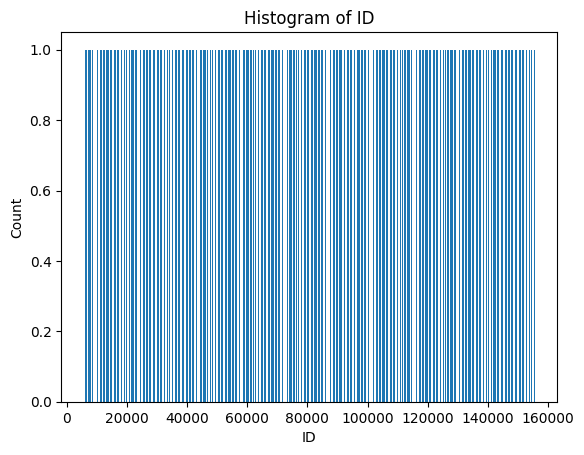

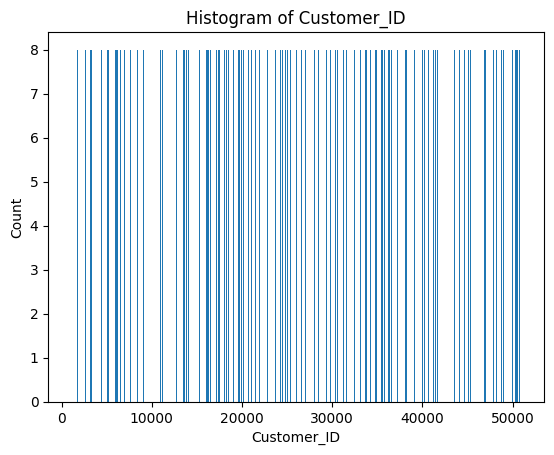

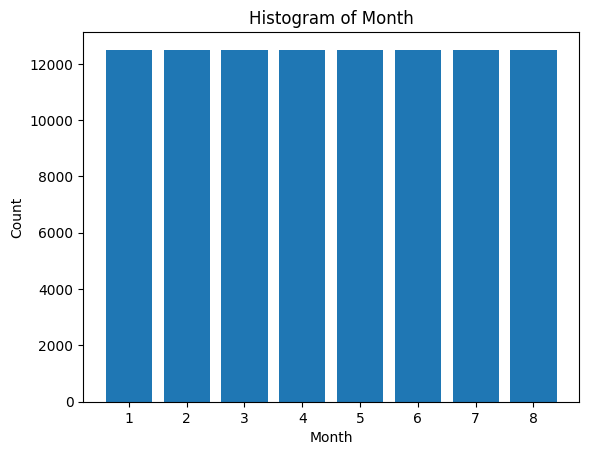

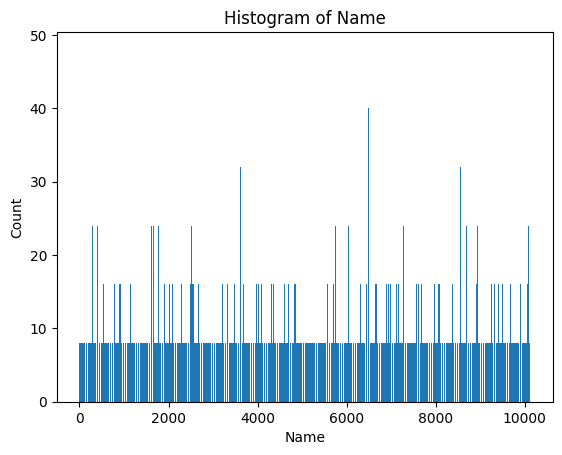

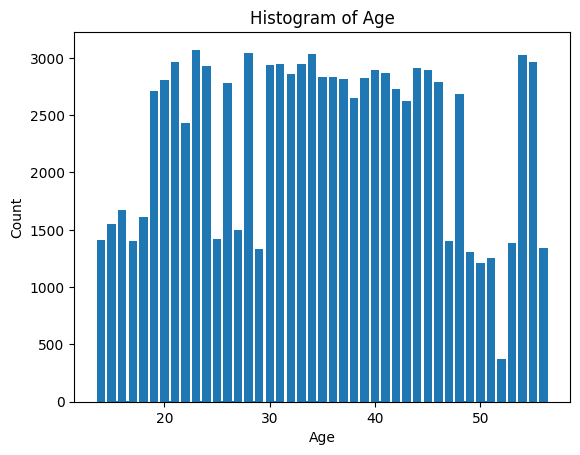

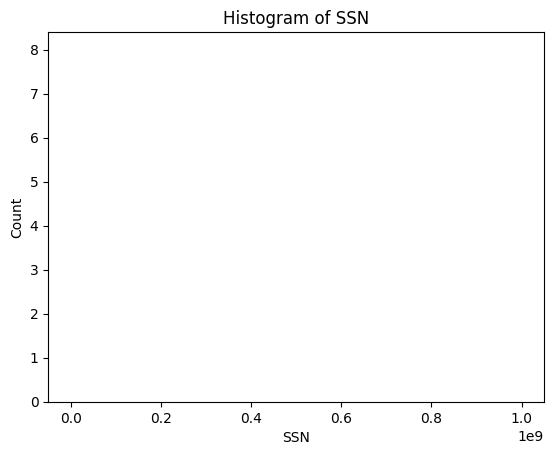

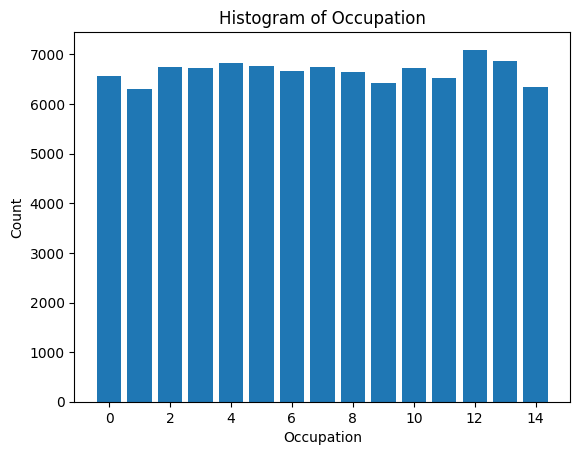

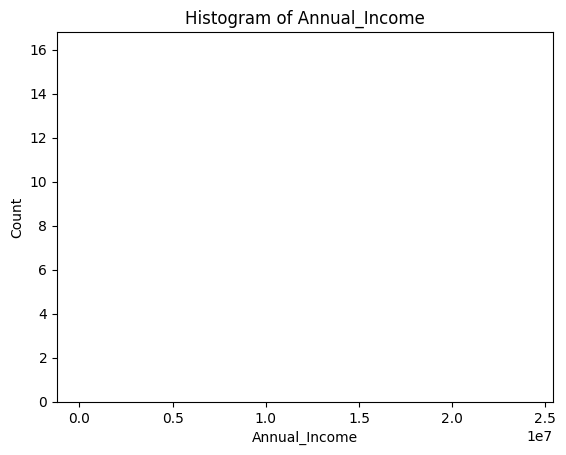

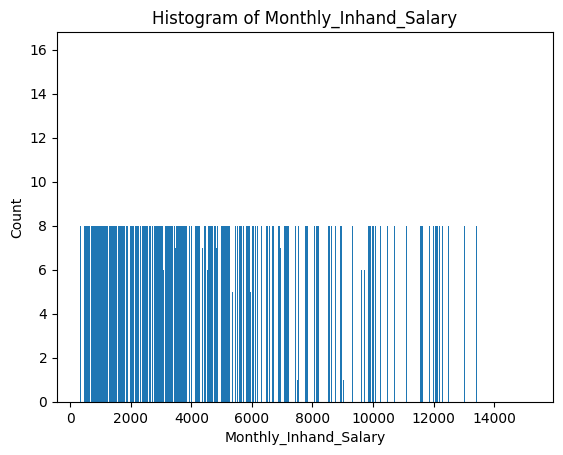

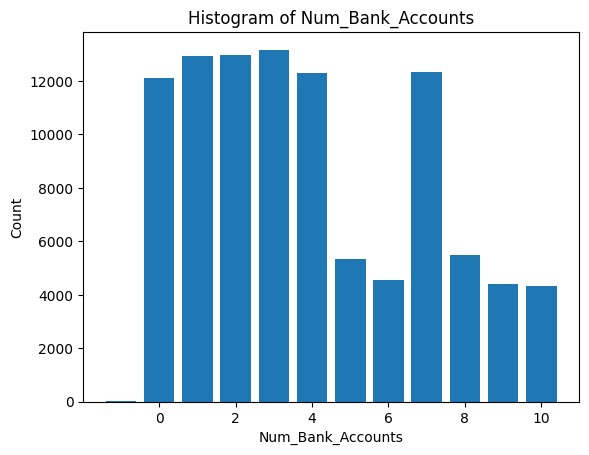

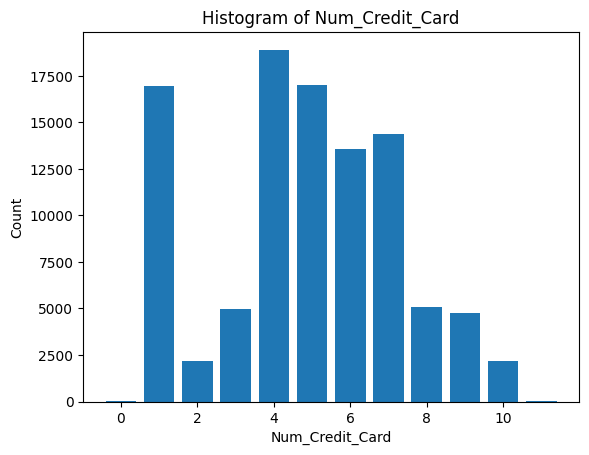

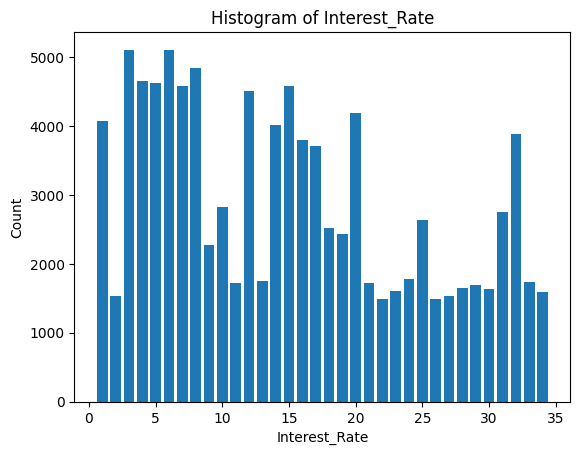

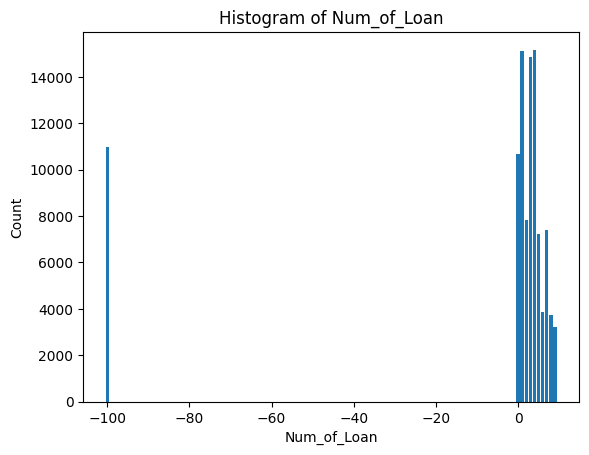

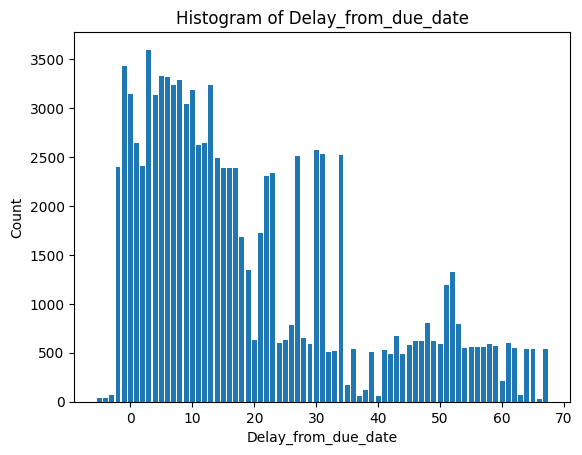

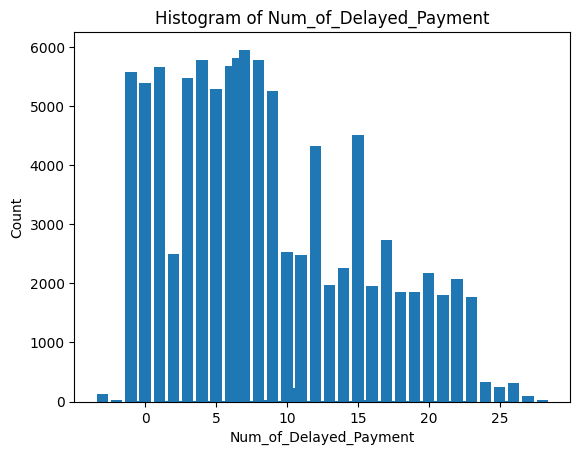

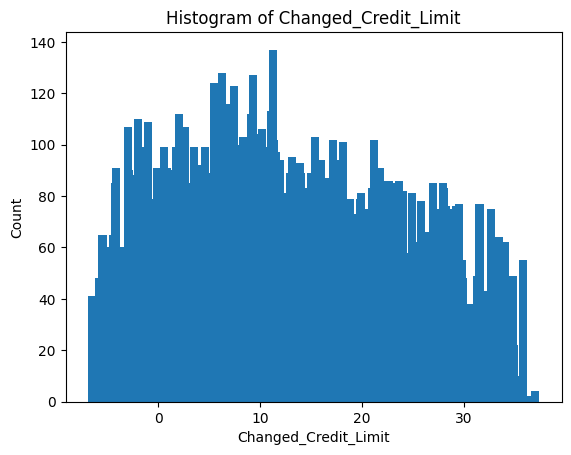

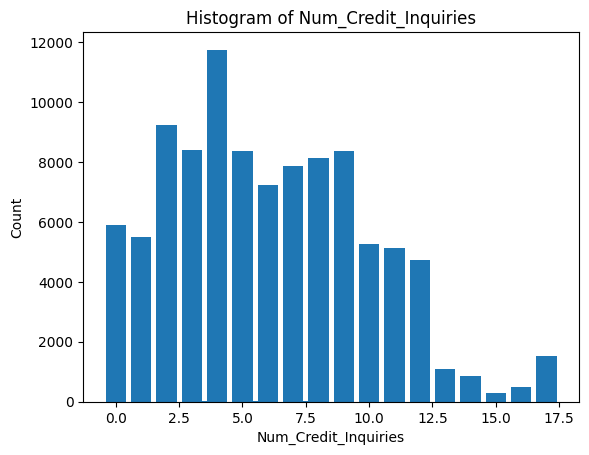

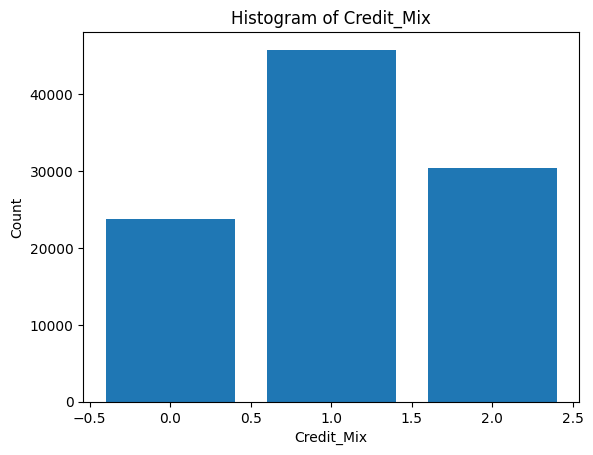

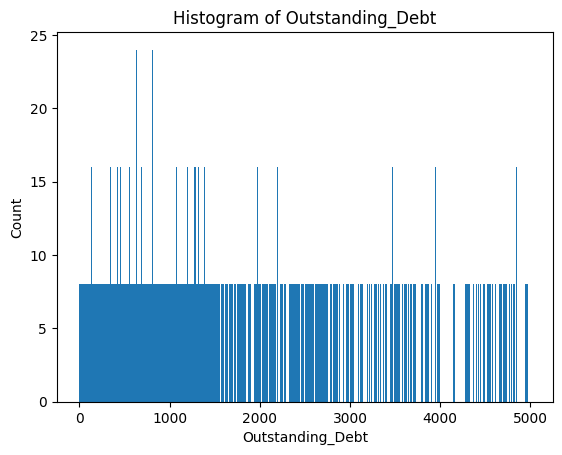

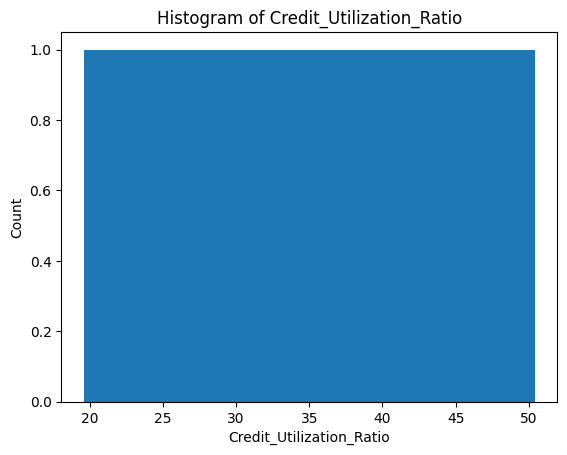

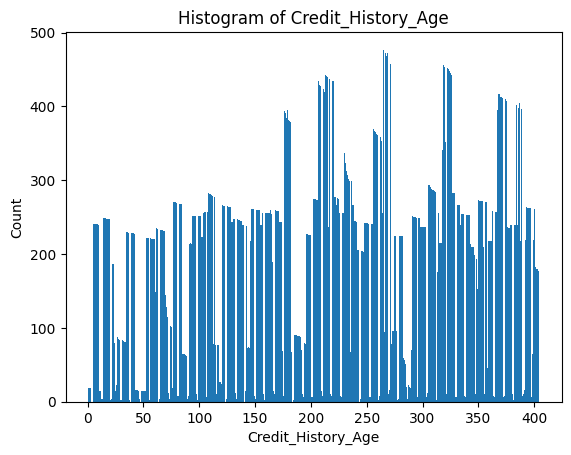

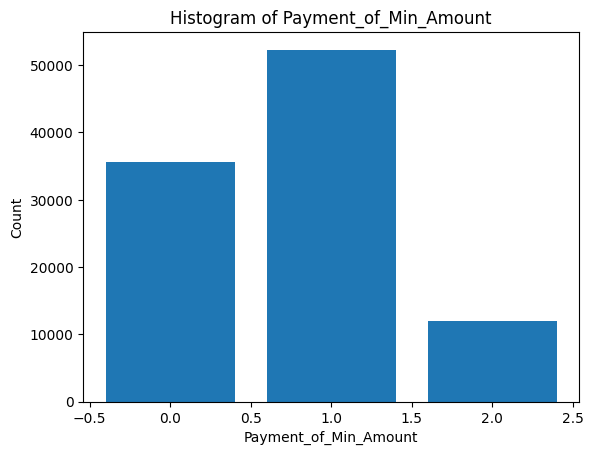

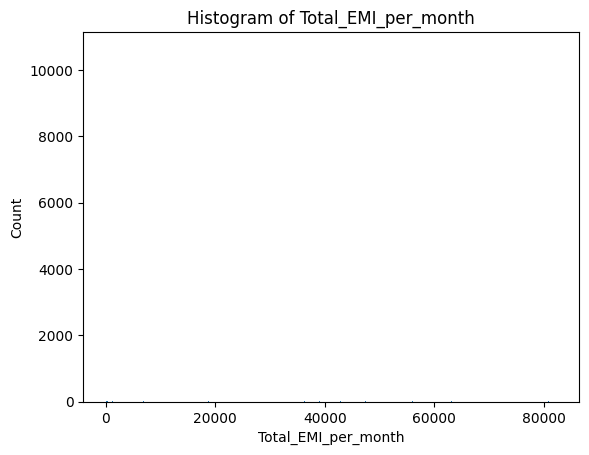

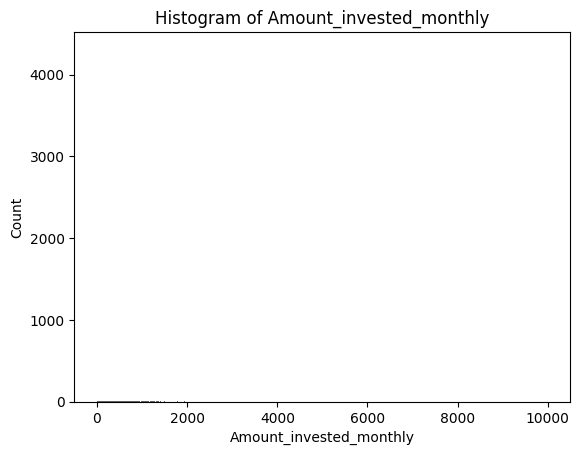

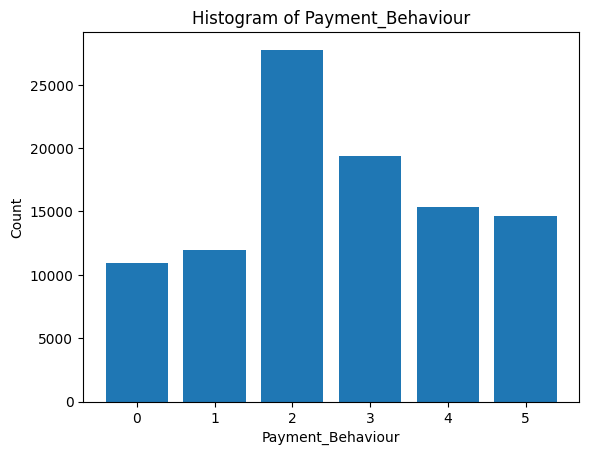

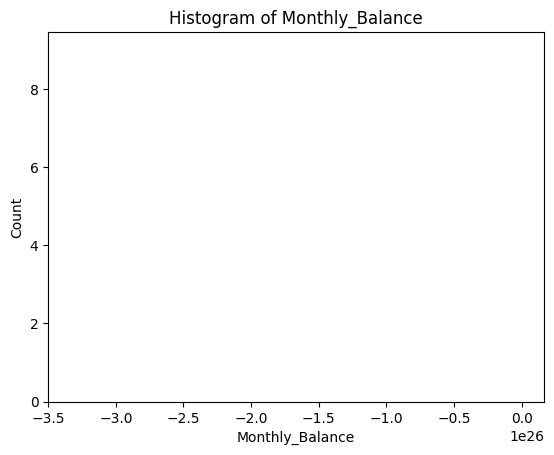

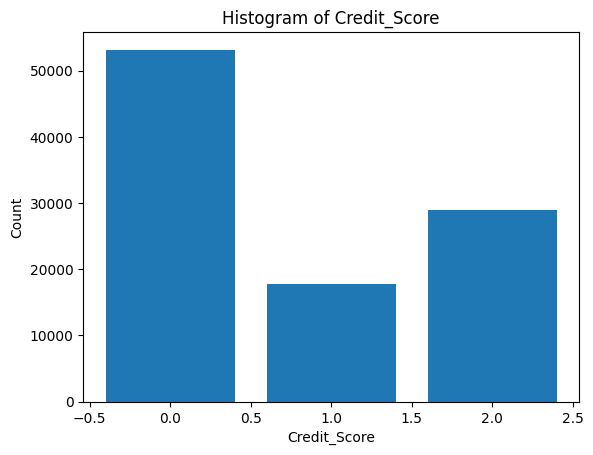

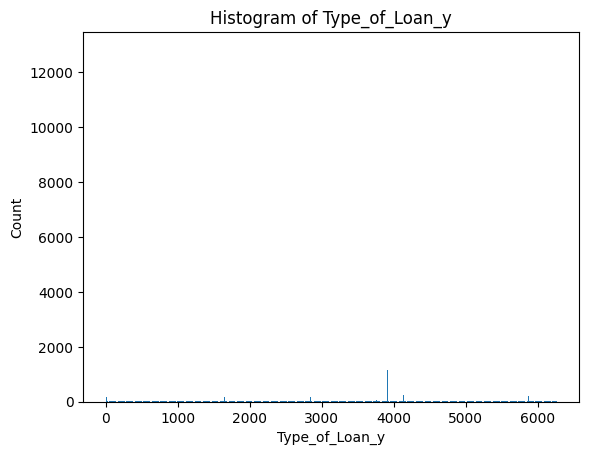

In [15]:
for column in df.columns:
    unique_values = df[column].unique()
    value_counts = df[column].value_counts()

    # Plot the histogram
    plt.figure()
    plt.bar(unique_values, value_counts)
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.title(f'Histogram of {column}')
    plt.show()

In [16]:
df = df.abs()

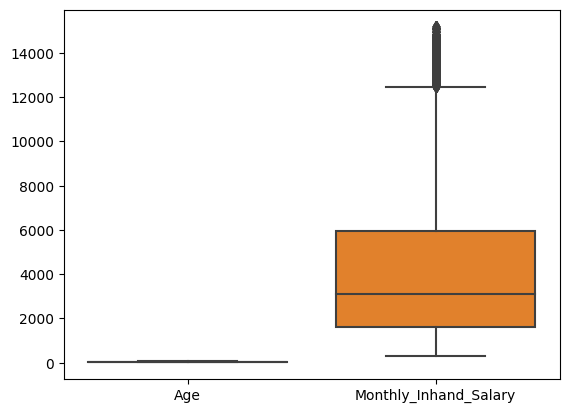

In [19]:
sns.boxplot(data=df[['Age', 'Monthly_Inhand_Salary']])
plt.show()

In [20]:
df.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score', 'Type_of_Loan_y'],
      dtype='object')

In [21]:
# Create a feature for monthly savings
df['Monthly_Savings'] = df['Monthly_Inhand_Salary'] - df['Annual_Income'] / 12

# Create a feature for the total number of financial accounts
df['Total_Accounts'] = df['Num_Bank_Accounts'] + df['Num_Credit_Card']

# Create a feature for the average monthly income
df['Avg_Monthly_Income'] = df['Annual_Income'] / 12

# Create a feature for the average monthly spending
df['Avg_Monthly_Spending'] = df['Avg_Monthly_Income'] - df['Monthly_Inhand_Salary']

# Create a feature for the income-to-age ratio
df['Income_to_Age_Ratio'] = df['Annual_Income'] / df['Age']

# Create a feature for the monthly savings-to-income ratio
df['Savings_to_Income_Ratio'] = df['Monthly_Savings'] / df['Annual_Income']

In [22]:
df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Payment_Behaviour,Monthly_Balance,Credit_Score,Type_of_Loan_y,Monthly_Savings,Total_Accounts,Avg_Monthly_Income,Avg_Monthly_Spending,Income_to_Age_Ratio,Savings_to_Income_Ratio
0,5634,3392,1,11,23.0,821000265.0,12,19114.12,1824.843333,3.0,...,2,312.494089,0,135,232.0,7.0,1592.843333,-232.0,831.048696,0.012138
1,5635,3392,2,11,23.0,821000265.0,12,19114.12,1824.843333,3.0,...,3,284.629162,0,135,232.0,7.0,1592.843333,-232.0,831.048696,0.012138
2,5636,3392,3,11,23.0,821000265.0,12,19114.12,1824.843333,3.0,...,4,331.209863,0,135,232.0,7.0,1592.843333,-232.0,831.048696,0.012138
3,5637,3392,4,11,23.0,821000265.0,12,19114.12,1824.843333,3.0,...,5,223.451310,0,135,232.0,7.0,1592.843333,-232.0,831.048696,0.012138
4,5638,3392,5,11,23.0,821000265.0,12,19114.12,1824.843333,3.0,...,1,341.489231,0,135,232.0,7.0,1592.843333,-232.0,831.048696,0.012138


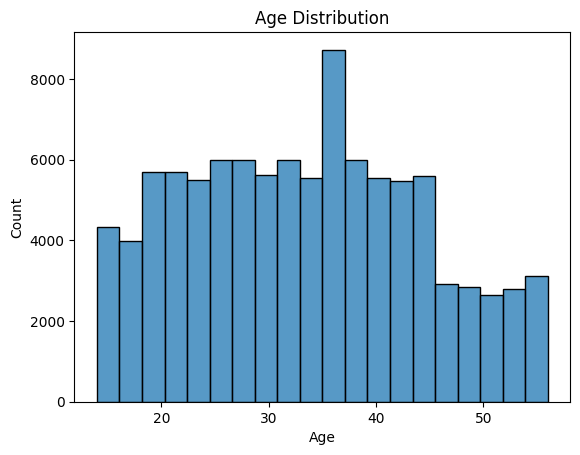

In [23]:
# Age distribution
sns.histplot(data=df, x='Age', bins=20)
plt.title('Age Distribution')
plt.show()



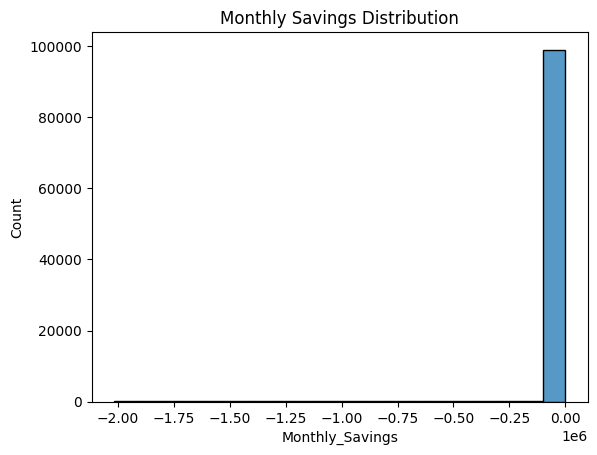

In [24]:
# Monthly savings distribution
sns.histplot(data=df, x='Monthly_Savings', bins=20)
plt.title('Monthly Savings Distribution')
plt.show()



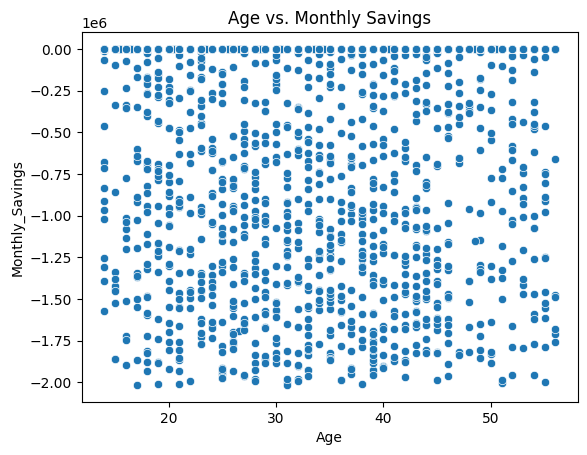

In [25]:
# Scatter plot of age vs. monthly savings
sns.scatterplot(data=df, x='Age', y='Monthly_Savings')
plt.title('Age vs. Monthly Savings')
plt.show()



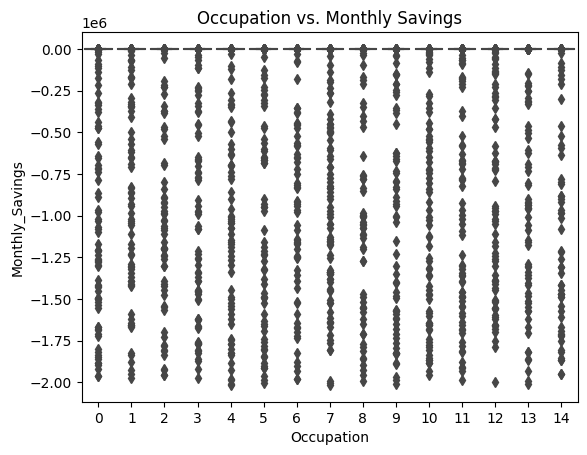

In [26]:
# Box plot of occupation vs. monthly savings
sns.boxplot(data=df, x='Occupation', y='Monthly_Savings')
plt.title('Occupation vs. Monthly Savings')
plt.show()



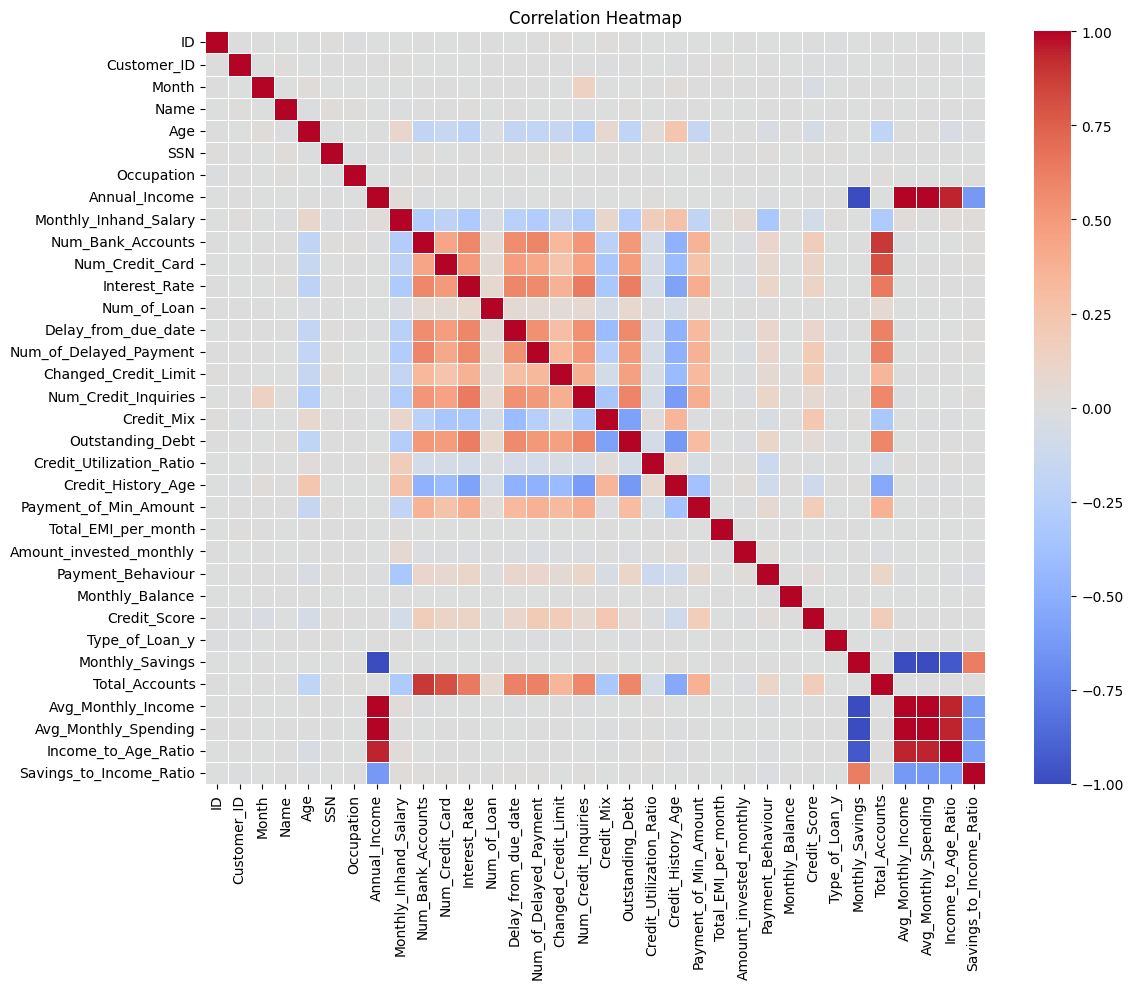

In [30]:
# Increase the figure size
plt.figure(figsize=(12, 10))

# Correlation heatmap
corr_matrix = df.corr()

# Customize the heatmap
sns.heatmap(corr_matrix, annot=False, fmt=".2f", cmap='coolwarm', linewidths=0.5)

# Rotate the x-axis tick labels for better readability
plt.xticks(rotation=90)

# Add a title
plt.title('Correlation Heatmap')

# Adjust the layout to prevent overlapping of the heatmap
plt.tight_layout()

# Display the heatmap
plt.show()

In [32]:
df.describe()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Payment_Behaviour,Monthly_Balance,Credit_Score,Type_of_Loan_y,Monthly_Savings,Total_Accounts,Avg_Monthly_Income,Avg_Monthly_Spending,Income_to_Age_Ratio,Savings_to_Income_Ratio
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,1.000000e+05,100000.000000,1.000000e+05,100000.000000,100000.00000,...,100000.000000,1.000000e+05,100000.000000,100000.000000,1.000000e+05,100000.000000,1.000000e+05,1.000000e+05,1.000000e+05,100000.000000
mean,80631.500000,25982.666640,4.500000,5072.890640,33.311600,5.004617e+08,6.949840,1.764157e+05,4198.350924,5.36896,...,2.733990,3.000000e+22,1.353460,3134.045200,-1.050296e+04,10.902640,1.470131e+04,1.050296e+04,5.853808e+03,-0.000937
std,43301.486619,14340.543051,2.291299,2911.570291,10.764715,2.908267e+08,4.309542,1.429618e+06,3187.402015,2.59270,...,1.860624,3.162151e+24,0.764913,1711.391041,1.190801e+05,3.967349,1.191348e+05,1.190801e+05,5.037895e+04,0.011483
min,5634.000000,1006.000000,1.000000,0.000000,14.000000,8.134900e+04,0.000000,7.005930e+03,303.645417,0.00000,...,0.000000,7.759665e-03,0.000000,0.000000,-2.015370e+06,1.000000,5.838275e+02,-3.588786e+02,1.558291e+02,-0.083315
25%,43132.750000,13664.500000,2.750000,2559.000000,24.000000,2.451686e+08,3.000000,1.945750e+04,1626.761667,3.00000,...,1.000000,2.703231e+02,1.000000,1709.750000,-1.620000e+02,8.000000,1.621458e+03,-1.460000e+02,6.348928e+02,-0.003680
50%,80631.500000,25777.000000,4.500000,5064.000000,33.000000,5.006886e+08,7.000000,3.757861e+04,3095.978333,5.00000,...,3.000000,3.372971e+02,2.000000,3463.000000,-1.000000e+01,11.000000,3.131551e+03,1.000000e+01,1.228301e+03,-0.000187
75%,118130.250000,38385.000000,6.250000,7613.250000,42.000000,7.560027e+08,11.000000,7.279092e+04,5961.637500,7.00000,...,5.000000,4.719681e+02,2.000000,4463.250000,1.460000e+02,14.000000,6.065910e+03,1.620000e+02,2.317111e+03,0.003215
max,155629.000000,50999.000000,8.000000,10127.000000,56.000000,9.999934e+08,14.000000,2.419806e+07,15204.633333,10.00000,...,5.000000,3.333333e+26,2.000000,6259.000000,3.588786e+02,21.000000,2.016505e+06,2.015370e+06,1.490287e+06,0.040279


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 34 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  int64  
 1   Customer_ID               100000 non-null  int64  
 2   Month                     100000 non-null  int64  
 3   Name                      100000 non-null  int64  
 4   Age                       100000 non-null  float64
 5   SSN                       100000 non-null  float64
 6   Occupation                100000 non-null  int64  
 7   Annual_Income             100000 non-null  float64
 8   Monthly_Inhand_Salary     100000 non-null  float64
 9   Num_Bank_Accounts         100000 non-null  float64
 10  Num_Credit_Card           100000 non-null  float64
 11  Interest_Rate             100000 non-null  float64
 12  Num_of_Loan               100000 non-null  float64
 13  Delay_from_due_date       100000 non-null  in

Splitting Data

In [37]:
df=df.drop(['ID'],axis=1)

In [38]:
df

,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,...,Payment_Behaviour,Monthly_Balance,Credit_Score,Type_of_Loan_y,Monthly_Savings,Total_Accounts,Avg_Monthly_Income,Avg_Monthly_Spending,Income_to_Age_Ratio,Savings_to_Income_Ratio
0,3392,1,11,23.0,821000265.0,12,19114.12,1824.843333,3.0,4.0,...,2,312.494089,0,135,232.0,7.0,1592.843333,-232.0,831.048696,0.012138
1,3392,2,11,23.0,821000265.0,12,19114.12,1824.843333,3.0,4.0,...,3,284.629162,0,135,232.0,7.0,1592.843333,-232.0,831.048696,0.012138
2,3392,3,11,23.0,821000265.0,12,19114.12,1824.843333,3.0,4.0,...,4,331.209863,0,135,232.0,7.0,1592.843333,-232.0,831.048696,0.012138
3,3392,4,11,23.0,821000265.0,12,19114.12,1824.843333,3.0,4.0,...,5,223.451310,0,135,232.0,7.0,1592.843333,-232.0,831.048696,0.012138
4,3392,5,11,23.0,821000265.0,12,19114.12,1824.843333,3.0,4.0,...,1,341.489231,0,135,232.0,7.0,1592.843333,-232.0,831.048696,0.012138
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,37932,4,6508,25.0,78735990.0,9,39628.99,3359.415833,4.0,6.0,...,0,479.866228,1,613,57.0,10.0,3302.415833,-57.0,1585.159600,0.001438
99996,37932,5,6508,25.0,78735990.0,9,39628.99,3359.415833,4.0,6.0,...,1,496.651610,1,613,57.0,10.0,3302.415833,-57.0,1585.159600,0.001438
99997,37932,6,6508,25.0,78735990.0,9,39628.99,3359.415833,4.0,6.0,...,0,516.809083,1,613,57.0,10.0,3302.415833,-57.0,1585.159600,0.001438
99998,37932,7,6508,25.0,78735990.0,9,39628.99,3359.415833,4.0,6.0,...,3,319.164979,2,613,57.0,10.0,3302.415833,-57.0,1585.159600,0.001438


In [42]:
y=df['Credit_Score']
X=df.drop(['Credit_Score'],axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


Creating Model

In [41]:
# WONT WORK RN AS WE NEED TO PROCESS THE DATA FIRST!
# Train the classification model
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LogisticRegression(max_iter=1000,solver='saga')
model.fit(X_train_scaled, y_train)

# Predict the labels for the test set
y_pred = model.predict(X_test)

# Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.17815151515151514


c:\Users\harsh\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [43]:
from sklearn.svm import SVC
# Scale the input data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train the SVC model
model = SVC()
model.fit(X_train_scaled, y_train)

# Predict the labels for the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7086060606060606


Testing

In [83]:
test_df=pd.read_csv(r'archive\test.csv')
test_df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,0x160a,CUS_0xd40,September,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,2022.0,Good,809.98,35.030402,22 Years and 9 Months,No,49.574949,236.64268203272135,Low_spent_Small_value_payments,186.26670208571772
1,0x160b,CUS_0xd40,October,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.843333,3,...,4.0,Good,809.98,33.053114,22 Years and 10 Months,No,49.574949,21.465380264657146,High_spent_Medium_value_payments,361.44400385378196
2,0x160c,CUS_0xd40,November,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.843333,3,...,4.0,Good,809.98,33.811894,NaN,No,49.574949,148.23393788500925,Low_spent_Medium_value_payments,264.67544623342997
3,0x160d,CUS_0xd40,December,Aaron Maashoh,24_,821-00-0265,Scientist,19114.12,NaN,3,...,4.0,Good,809.98,32.430559,23 Years and 0 Months,No,49.574949,39.08251089460281,High_spent_Medium_value_payments,343.82687322383634
4,0x1616,CUS_0x21b1,September,Rick Rothackerj,28,004-07-5839,_______,34847.84,3037.986667,2,...,5.0,Good,605.03,25.926822,27 Years and 3 Months,No,18.816215,39.684018417945296,High_spent_Large_value_payments,485.2984336755923


Preprocssing

In [84]:
# Same preprocessing which was done on the train data

Testing Unseen Data

In [85]:
# Doing the same accuracy score type of function but with unseen test data.

Creating Report

In [86]:
# Here we would test multiple classification models like logistic regression, SVC, Decision Tree, Random Forest, etc
#  And then storing all the accuracy, pression recall of each model in a dictionary

# sample_dict={'logistic_regression':[precision,recall,f1_score,accuracy],
#               'SVC':[precision,recall,f1_score,accuracy],
#                ....}

Plots

In [87]:
# Creating plots of our final analysis.

Creating an Application